# Shot Angle And Level Classifiyer Implemented

## Import Libraries

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil
import torch

In [34]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.17  Python-3.12.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
Setup complete  (16 CPUs, 31.7 GB RAM, 581.5/931.0 GB disk)


In [35]:
from ultralytics import YOLO

## Model Assignment

In [36]:
level_model = YOLO('level-model-training/runs/classify/train4/weights/best.pt')

In [37]:
angle_model = YOLO('angle-model-training/runs/classify/train17/weights/best.pt')

## Show Testing

In [49]:
#Import photo from a directory 
import os, random 
image_dir = 'Raw Datasets/OtherTests'
image_file = image_dir + '/' + random.choice(os.listdir(image_dir))

print(image_file)

Raw Datasets/OtherTests/headspace_8.png


In [55]:
# Import image from link 
image_file = 'https://4192879.fs1.hubspotusercontent-na1.net/hub/4192879/hubfs/Blog%20Images/2021/April/Blog-March-LowAngle.jpg?width=944&height=590&name=Blog-March-LowAngle.jpg'

In [56]:
angle_model(image_file, save=True)

100%|█████████████████████████████████████████████████████████████████████████████| 84.7k/84.7k [00:00<00:00, 7.08MB/s]


image 1/1 C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\Blog-March-LowAngle.jpg: 224x224 low 0.98, dutch 0.02, high 0.00, neutral 0.00, overhead 0.00, 4.0ms
Speed: 5.5ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs\classify\predict4


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'dutch', 1: 'high', 2: 'low', 3: 'neutral', 4: 'overhead'}
 obb: None
 orig_img: array([[[233, 242, 239],
         [231, 240, 237],
         [229, 238, 235],
         ...,
         [212, 212, 206],
         [211, 211, 205],
         [209, 209, 203]],
 
        [[231, 240, 237],
         [230, 239, 236],
         [228, 237, 234],
         ...,
         [211, 211, 205],
         [210, 210, 204],
         [209, 209, 203]],
 
        [[229, 238, 235],
         [228, 237, 234],
         [227, 236, 233],
         ...,
         [209, 210, 201],
         [209, 210, 201],
         [210, 211, 202]],
 
        ...,
 
        [[225, 229, 223],
         [227, 231, 225],
         [226, 230, 224],
         ...,
         [217, 220, 211],
         [218, 221, 212],
         [218, 221, 212]],
 
        [[225, 229, 223],
         [226, 230, 224],
         [226, 230, 224],
         ...,
    

In [58]:
level_model(image_file, save=True)


Found https://4192879.fs1.hubspotusercontent-na1.net/hub/4192879/hubfs/Blog Images/2021/April/Blog-March-LowAngle.jpg locally at Blog-March-LowAngle.jpg
image 1/1 C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\Blog-March-LowAngle.jpg: 224x224 shoulder 0.99, eye 0.01, aerial 0.00, hip 0.00, ground-knee 0.00, 4.1ms
Speed: 6.7ms preprocess, 4.1ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs\classify\predict5


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'aerial', 1: 'eye', 2: 'ground-knee', 3: 'hip', 4: 'shoulder'}
 obb: None
 orig_img: array([[[233, 242, 239],
         [231, 240, 237],
         [229, 238, 235],
         ...,
         [212, 212, 206],
         [211, 211, 205],
         [209, 209, 203]],
 
        [[231, 240, 237],
         [230, 239, 236],
         [228, 237, 234],
         ...,
         [211, 211, 205],
         [210, 210, 204],
         [209, 209, 203]],
 
        [[229, 238, 235],
         [228, 237, 234],
         [227, 236, 233],
         ...,
         [209, 210, 201],
         [209, 210, 201],
         [210, 211, 202]],
 
        ...,
 
        [[225, 229, 223],
         [227, 231, 225],
         [226, 230, 224],
         ...,
         [217, 220, 211],
         [218, 221, 212],
         [218, 221, 212]],
 
        [[225, 229, 223],
         [226, 230, 224],
         [226, 230, 224],
         ...,


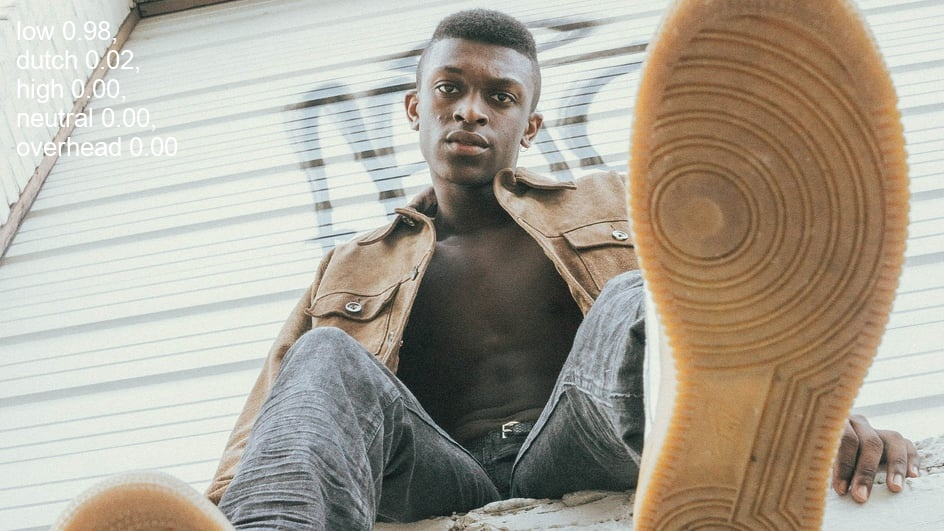

In [60]:
%matplotlib inline
from PIL import Image
Image.open('runs/classify/predict4/Blog-March-LowAngle.jpg')


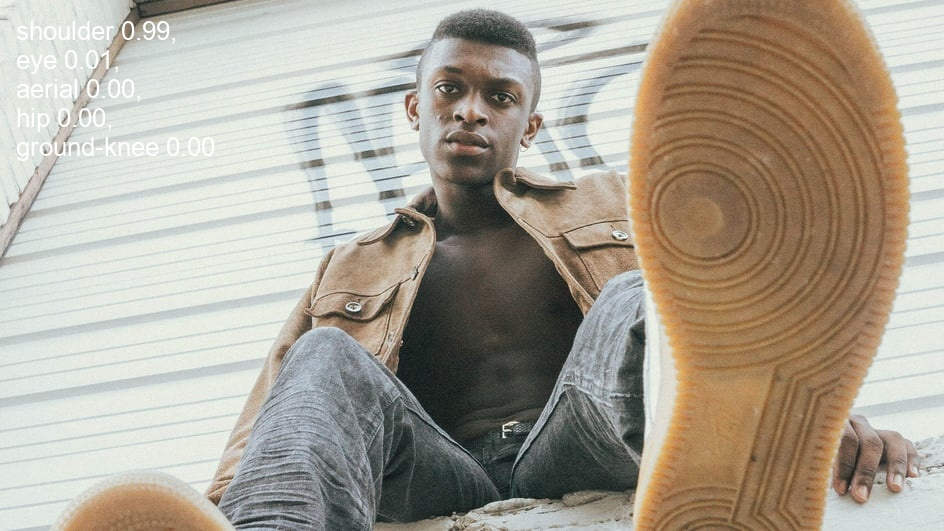

In [59]:
Image.open('runs/classify/predict5/Blog-March-LowAngle.jpg')